In [1]:
import pkfire.dist_lib.dist as dlib
from pkfire.ptl_lib.profiles import Profiles
from pkfire.pkfire import Pkfire, XPkfire
from pkfire.grid_lib.grid import Grid
from pkfire.movie_lib.movie_super import Movie
import numpy as np
import matplotlib.pyplot as plt
from colossus.halo import profile_outer
from colossus.halo import profile_composite
from colossus.halo import profile_nfw
from colossus.cosmology import cosmology
from colussus.halo import concentration

cosmo = cosmology.setCosmology('planck18')


In [ ]:
def nfw(r, m):
    c = concentration.concentration(m, '500c', 0, model = 'bullock01')
    p_nfw = profile_nfw.NFWProfile(M = m, c = c, z = 0, mdef = '500c')
    m_enc = 

In [2]:


il = dlib.Illustris('/Users/cosinga/illustris/L75n1820TNG/output/', 99)

In [3]:
grid = Grid([100]*3, 75)
centers = il.getGroupPos()
masses = il.getGroupMass()

prof = Profiles(centers[:20, :], one)
pkf = Pkfire(grid, prof)


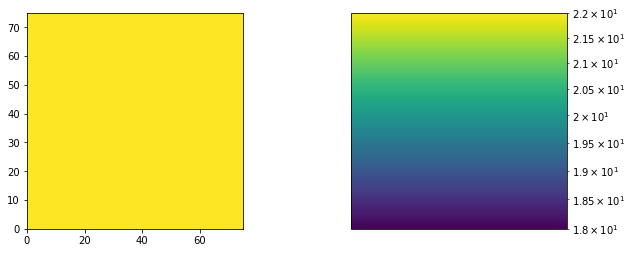

In [4]:
pkf.gridPtls()
fig, axes = Movie._makeFig(2)
pkf.gridPlot(axes[0], axes[1])

In [5]:
pkflist = []
gridshape = [100] * 3
nframes = 10

gals_stmass = Particles(pos, mass)
stgrid = Grid(gridshape, il.getBox())
stpkf = Pkfire(stgrid, gals_stmass)

for i in range(nframes):
    gals_hi = Particles(pos, himass)
    higrid = Grid(gridshape, il.getBox())
    hipkf = Pkfire(higrid, gals_hi)
        
    xpkf = XPkfire(stpkf, hipkf)
    pkflist.append(xpkf)
    
    himass[gmass_sub_mask] *= 0.5
    

NameError: name 'Particles' is not defined

In [5]:
def plot(pkf):
    ncols = 4
    wspace = 0.2
    wrs = np.ones(ncols)
    wrs[-1] = 0.15
    fig, axes = Movie._makeFig(ncols, width_ratios = wrs, gspec_kw = {'wspace':wspace})
    
    pkf.pkPlot(axes[0])
    pkf.obsbiasPlot(axes[1])
    stpkf.ptlPlot(axes[2], axes[3])
    
    axes[0].set_ylabel('P (k) (h / cMpc)$^3$', fontsize = 12)
    axes[1].set_ylabel('b (k)')
    axes[2].set_xlabel('x (cMpc / h)')
    axes[2].set_ylabel('y (cMpc / h)')
    axes[3].set_ylabel('M (M$_\\odot$)')
    fig.text(0.5, 0, 'k (h / cMpc)', fontsize = 12, ha = 'center', va = 'bottom')
    for ax in axes:
        ax.tick_params(direction = 'in')
    return fig, axes

making frame 0

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 13.58
Time taken = 13.62 seconds

Computing correlation function of the field...
Time to complete loop = 6.76
Time taken = 14.77 seconds
making frame 1

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 13.74
Time taken = 13.76 seconds

Computing correlation function of the field...
Time to complete loop = 7.14
Time taken = 15.60 seconds
making frame 2

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 12.12
Time taken = 12.14 seconds

Computing correlation function of the field...
Time to complete loop = 6.04
Time taken = 13.34 seconds
making frame 3

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 17.07
Time taken = 17.09 seconds

Computing correlation function of the field...
Time to complete loop = 6.14
Time taken = 14.92 seconds
making frame 4

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 11.68
Time taken = 11.

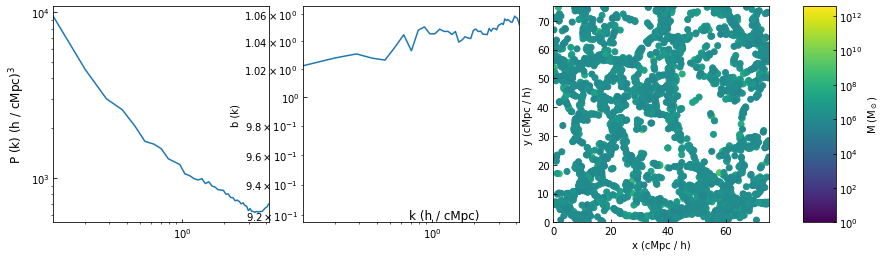

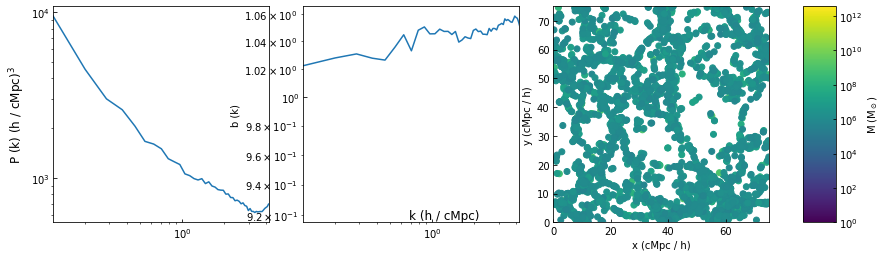

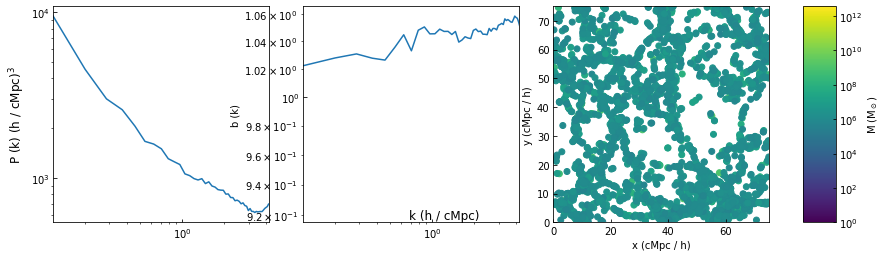

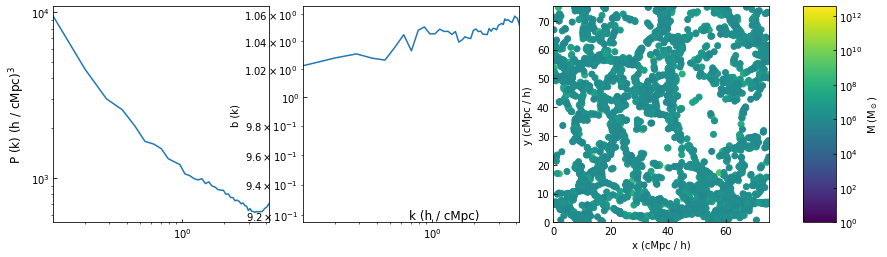

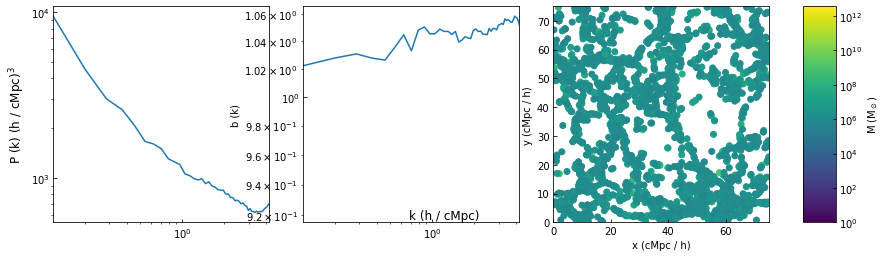

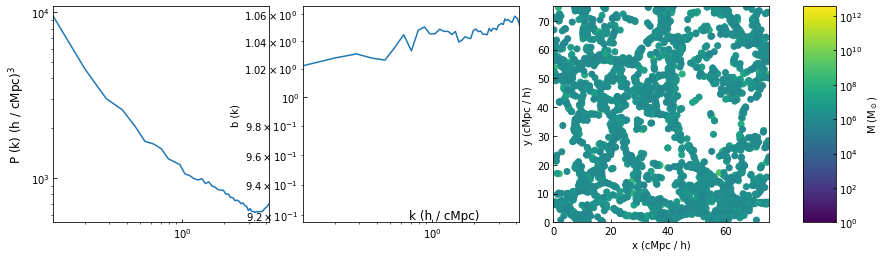

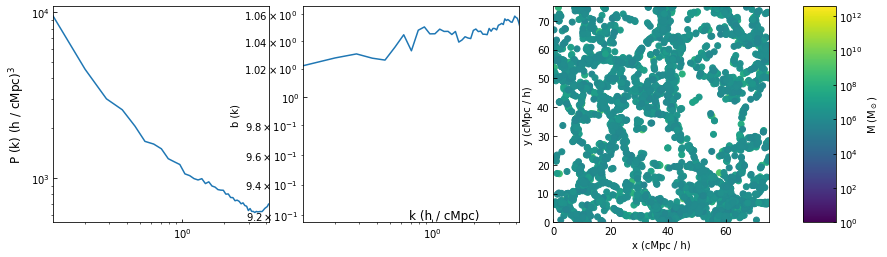

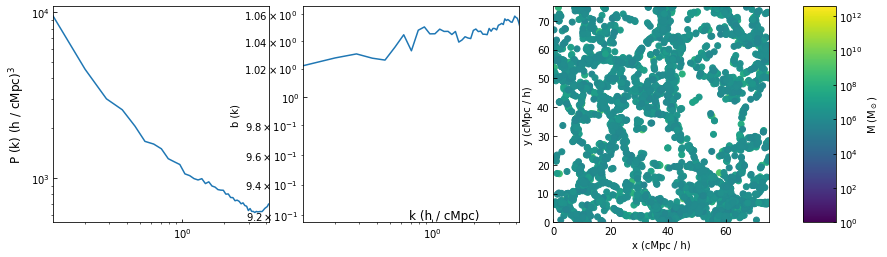

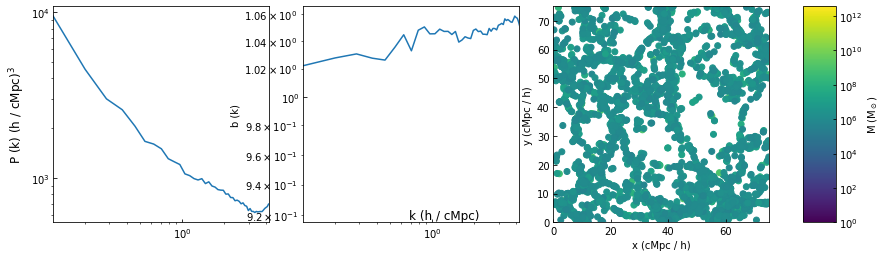

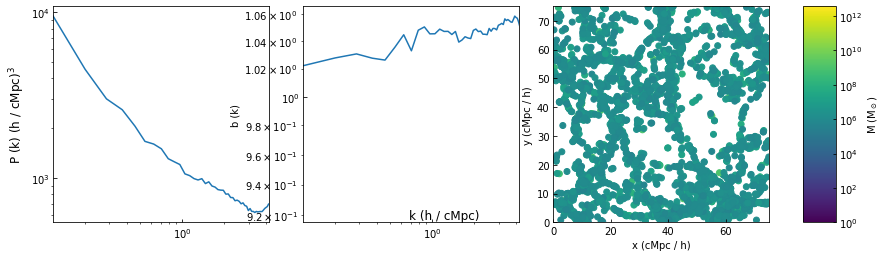

In [6]:
movie = Movie(xpkf, 1)
movie.run(pkflist, plot, "/Users/cosinga/code/hcolor/fig_md_analysis/pres_movies/")

NameError: name 'xsthi' is not defined